<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [200]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [201]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [202]:
df = pd.read_csv('Data/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [203]:
df.shape

(346, 10)

In [204]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object


In [205]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [206]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [207]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


In [208]:
df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

Let's plot some columns to underestand data better:


In [209]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y
import seaborn as sns

In [210]:
df.Principal.min(), df.Principal.max()

(300, 1000)

[ 300.    377.78  455.56  533.33  611.11  688.89  766.67  844.44  922.22
 1000.  ]


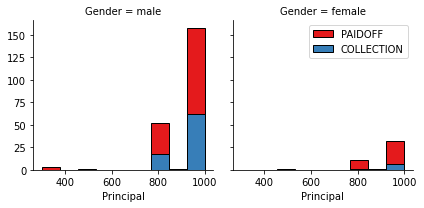

In [211]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
print(bins)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

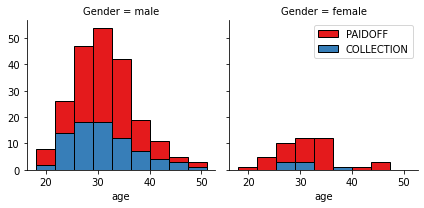

In [212]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


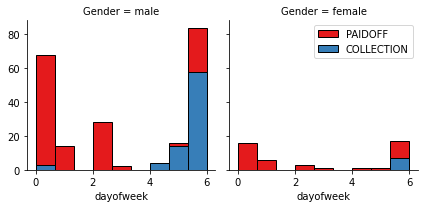

In [213]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [214]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [215]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [216]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [217]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [218]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [219]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [220]:
Feature['Master or Above'].value_counts()

0    344
1      2
Name: Master or Above, dtype: int64

In [221]:
Feature['High School or Below'].value_counts()

0    195
1    151
Name: High School or Below, dtype: int64

In [222]:
Feature['college'].value_counts()

0    197
1    149
Name: college, dtype: int64

In [223]:
Feature['Bechalor'].value_counts()

0    302
1     44
Name: Bechalor, dtype: int64

In [224]:
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [225]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [226]:
df['loan_status'].values[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [227]:
df['status_val'] = df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=False)
#df.head()

In [228]:
y = df['status_val'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [229]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

## Train Valid split

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Valid set:', X_valid.shape,  y_valid.shape)

Train set: (276, 8) (276,)
Valid set: (70, 8) (70,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


## K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


### Evaluation for different values of k neighbors

In [232]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

jaccard_scores = np.zeros((Ks-1))
f1_scores = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_valid)
    
    mean_acc[n-1] = metrics.accuracy_score(y_valid, yhat)
    jaccard_scores[n-1] = metrics.jaccard_score(y_valid, yhat)
    f1_scores[n-1] = metrics.f1_score(y_valid, yhat)
    
    std_acc[n-1]=np.std(yhat==y_valid)/np.sqrt(yhat.shape[0])

#print(f'Accuracy Score : {mean_acc}')
#print(f'Jaccard Score : {jaccard_scores}')

The kNN algorithm does not have a loss function during training. In the sense that no parameters are minimized during training.

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.  

### f1-score metric vs Jaccard Index

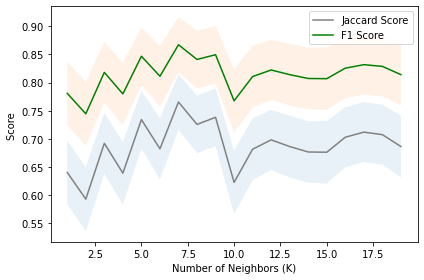

In [233]:
#plt.plot(range(1,Ks),mean_acc,'black')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)

plt.plot(range(1,Ks),jaccard_scores,'gray')
plt.fill_between(range(1,Ks), jaccard_scores - 1 * std_acc, jaccard_scores + 1 * std_acc, alpha=0.10)

plt.plot(range(1,Ks),f1_scores,'g')
plt.fill_between(range(1,Ks), f1_scores - 1 * std_acc, f1_scores + 1 * std_acc, alpha=0.10)

plt.legend(('Jaccard Score','F1 Score'))
plt.ylabel('Score ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [234]:
KNN_jaccard = jaccard_scores.max()
print( "The best jaccard score was", KNN_jaccard, "with k=", jaccard_scores.argmax()+1) 

The best jaccard score was 0.765625 with k= 7


In [235]:
KNN_f1 = f1_scores.max()
print( "The best F1 score was", KNN_f1, "with k=", f1_scores.argmax()+1) 

The best F1 score was 0.8672566371681416 with k= 7


## Decision Tree


Sklearn Decision Trees does not handle categorical variables. During preprocessing these features were converted to numerical dummy indicator variables using pandas.get_dummies(). 

In [236]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.tree import plot_tree
from sklearn.metrics import jaccard_score, f1_score

In [237]:
df.groupby('status_val').size()

status_val
0     86
1    260
dtype: int64

### Modelling

#### Picking the value for maximum leaf nodes

In [238]:
def tree_training(n, X_train, y_train, X_valid, y_valid):
    data = []
    for i in range(2, n):
        model_tree = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=i, class_weight='balanced')
        model_tree.fit(X_train, y_train)

        predTree = model_tree.predict(X_valid)

        tree_jaccard_score = jaccard_score(y_valid, predTree)
        tree_f1_score = f1_score(y_valid, predTree)

        data.append((i, tree_jaccard_score,tree_f1_score))
    
    return data
leaf_data = tree_training(200, X_train, y_train, X_valid, y_valid)

In [239]:
leaf_df = pd.DataFrame(leaf_data, columns =['no. leaf nodes', 'jaccard_score', 'f1_score'])
#leaf_df.head(25)

In [240]:
leaf_df.set_index('no. leaf nodes', inplace = True)

<AxesSubplot:xlabel='no. leaf nodes'>

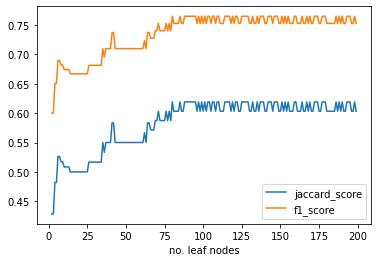

In [241]:
leaf_df.plot()

In [242]:
leaf_df[leaf_df.jaccard_score == leaf_df.jaccard_score.max() ]

,jaccard_score,f1_score
no. leaf nodes,,
80,0.619048,0.764706
85,0.619048,0.764706
88,0.619048,0.764706
89,0.619048,0.764706
90,0.619048,0.764706
...,...,...
190,0.619048,0.764706
193,0.619048,0.764706
194,0.619048,0.764706


Both jaccard and f1 scores peak at 83 maximum leaf nodes.

In [243]:
loan_tree_f1 = leaf_df.f1_score.max()
loan_tree_f1

0.764705882352941

In [244]:
loan_tree_jaccard = leaf_df.jaccard_score.max()
loan_tree_jaccard

0.6190476190476191

### Visualization

In [245]:
def show_tree(model_tree, columns):
    #Create the figure
    plt.figure(figsize=(20,10))

    #Create the tree plot
    plot_tree(model_tree,
               feature_names = columns, #Feature names
               class_names = ["0","1"], #Class names
               rounded = True,
               filled = True)

    plt.show()


In [246]:
var_columns = Feature.columns.to_list()
var_columns

['Principal',
 'terms',
 'age',
 'Gender',
 'weekend',
 'Bechalor',
 'High School or Below',
 'college']

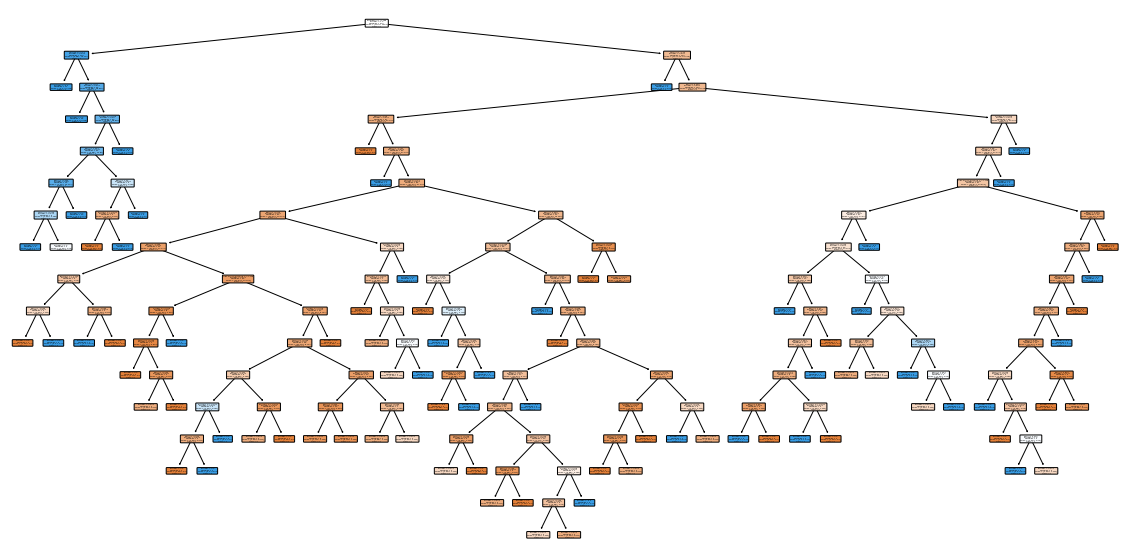

In [247]:
tree = DecisionTreeClassifier(criterion="entropy",  max_leaf_nodes=83, class_weight='balanced')
tree.fit(X_train, y_train)
show_tree(tree, var_columns)

## Support Vector Machine
[SVM notebook reference](https://github.com/runo-hr/Machine-Learning-with-Python/blob/master/ML0101EN-Clas-SVM-cancer.ipynb)  

In [248]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [249]:
labeled = pd.concat([Feature, df['status_val']], axis=1, ignore_index=False)
labeled.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,status_val
0,1000,30,45,0,0,0,1,0,1
1,1000,30,33,1,0,1,0,0,1
2,1000,15,27,0,0,0,0,1,1
3,1000,30,28,1,1,0,0,1,1
4,1000,30,29,0,1,0,0,1,1


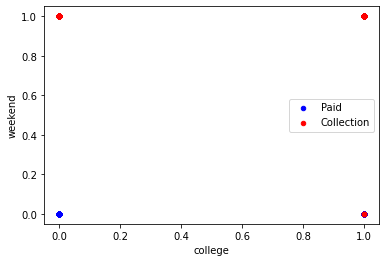

In [250]:
ax = labeled[labeled['status_val'] == 1].plot(kind='scatter', x='college', y='weekend', color='blue', label='Paid');
labeled[labeled['status_val'] == 0].plot(kind='scatter', x='college', y='weekend', color='red', label='Collection', ax=ax);
plt.show()

### Modeling (SVM with Scikit-learn)
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid

In [251]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

### Predicting

In [252]:
yhat = clf.predict(X_valid)
yhat [0:5]

array([0, 1, 1, 1, 1], dtype=int64)

### Evaluation

#### Classification report and confusion matrix

In [253]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [254]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


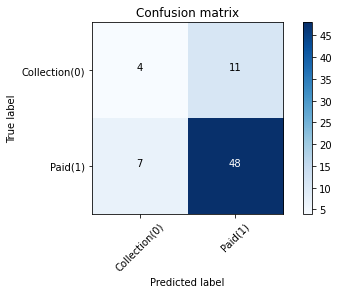

In [255]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_valid, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Collection(0)','Paid(1)'],normalize= False,  title='Confusion matrix')


In [256]:
from sklearn.metrics import jaccard_score, f1_score, log_loss

In [257]:
svm_jaccard = jaccard_score(y_valid, yhat)
print(f'SVM jaccard score : {svm_jaccard}')

SVM jaccard score : 0.7272727272727273


In [258]:
svm_f1 = f1_score(y_valid, yhat)
print(f'SVM f1 score : {svm_f1}')

SVM f1 score : 0.8421052631578948


## Logistic Regression


In [259]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Modelling

In [299]:
import numpy as np

In [364]:
regularization_data = []
for i in np.arange(0.01, 0.5, 0.01):
    LR = LogisticRegression(C=i, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_valid)
    yhat_prob = LR.predict_proba(X_valid)
    
    lr_jaccard = jaccard_score(y_valid, yhat)
    lr_f1 = f1_score(y_valid, yhat)
    lr_log_loss = log_loss(y_valid, yhat)
    
    regularization_data.append((i, lr_jaccard, lr_f1, lr_log_loss))


In [365]:
regularization_df = pd.DataFrame(regularization_data, columns =['Value of C', 'jaccard_score', 'f1_score', 'log_loss'])
regularization_df.shape

(49, 4)

In [366]:
regularization_df.head(2)

,Value of C,jaccard_score,f1_score,log_loss
0,0.01,0.676471,0.807018,10.855193
1,0.02,0.720588,0.837607,9.374959


In [367]:
regularization_df.set_index('Value of C', inplace = True)

In [368]:
regularization_df.head(2)

,jaccard_score,f1_score,log_loss
Value of C,,,
0.01,0.676471,0.807018,10.855193
0.02,0.720588,0.837607,9.374959


<AxesSubplot:xlabel='Value of C'>

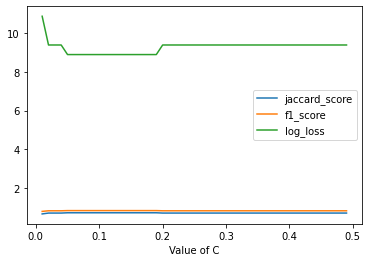

In [369]:
regularization_df.plot()

In [370]:
regularization_df[regularization_df.jaccard_score == regularization_df.jaccard_score.max() ]

,jaccard_score,f1_score,log_loss
Value of C,,,
0.05,0.735294,0.847458,8.881548
0.06,0.735294,0.847458,8.881548
0.07,0.735294,0.847458,8.881548
0.08,0.735294,0.847458,8.881548
0.09,0.735294,0.847458,8.881548
0.10,0.735294,0.847458,8.881548
0.11,0.735294,0.847458,8.881548
0.12,0.735294,0.847458,8.881548
0.13,0.735294,0.847458,8.881548


In [371]:
regularization_df[regularization_df.log_loss == regularization_df.log_loss.min() ]

,jaccard_score,f1_score,log_loss
Value of C,,,
0.05,0.735294,0.847458,8.881548
0.06,0.735294,0.847458,8.881548
0.07,0.735294,0.847458,8.881548
0.08,0.735294,0.847458,8.881548
0.09,0.735294,0.847458,8.881548
0.10,0.735294,0.847458,8.881548
0.11,0.735294,0.847458,8.881548
0.12,0.735294,0.847458,8.881548
0.13,0.735294,0.847458,8.881548


For this dataset, the regularization parameter C gives the best results when it is in the range of 0.05 to 0.19

### Evaluation

In [372]:
LR = LogisticRegression(C=0.05, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_valid)
yhat_prob = LR.predict_proba(X_valid)

In [373]:
lr_jaccard = jaccard_score(y_valid, yhat)
print(f'Linear Regression Jaccard Score : {lr_jaccard}')

lr_f1 = f1_score(y_valid, yhat)
print(f'Linear Regression Jaccard Score : {lr_f1}')

lr_log_loss = log_loss(y_valid, yhat)
print(f'Linear Regression log_loss : {lr_log_loss}')

Linear Regression Jaccard Score : 0.7352941176470589
Linear Regression Jaccard Score : 0.847457627118644
Linear Regression log_loss : 8.881548141071212


# Model Evaluation using Test set


In [264]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [265]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

## Load Test set for evaluation


In [266]:
test_df = pd.read_csv('Data/loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## Preprocess Test Data

### Convert to date time object


In [267]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


### Convert Categorical features to numerical values


In [268]:
# Add weekend indicator
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


Let's look at gender:


In [269]:
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

73 % of female pay there loans while only 74 % of males pay there loan


Let's convert male to 0 and female to 1:


In [270]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


### One Hot Encoding

#### How about education?


In [271]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

##### Features before One Hot Encoding


In [272]:
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [273]:
test_df.groupby('education').size()

education
Bechalor                 8
High School or Below    21
Master or Above          2
college                 23
dtype: int64

##### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [274]:
test_features = test_df[['Principal','terms','age','Gender','weekend']]
test_features = pd.concat([test_features,pd.get_dummies(test_df['education'])], axis=1)
test_features.drop(['Master or Above'], axis = 1,inplace=True)
test_features.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


### Feature Selection


Let's define feature sets, X:


In [275]:
X_test = test_features
X_test[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


What are our lables?


In [276]:
test_df['loan_status'].values[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [277]:
test_df['status_val'] = test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=False)
#df.head()

In [278]:
y_test = test_df['status_val'].values
y_test[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [279]:
X_test.shape, y_test.shape

((54, 8), (54,))

### Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [280]:
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [281]:
X_test.shape

(54, 8)

## Evaluation

### K Nearest Neighbors

In [282]:
from sklearn.neighbors import KNeighborsClassifier

In [283]:
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)

In [284]:
ypred=neigh.predict(X_test)

In [285]:
jaccard_knn = jaccard_score(y_test, ypred)
jaccard_knn

0.6538461538461539

In [286]:
f1_knn = f1_score(y_test, ypred)
f1_knn

0.7906976744186046

### Decision Tree

In [287]:
from sklearn.tree import DecisionTreeClassifier


In [288]:
tree_classifier = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=80, class_weight='balanced')
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_leaf_nodes=80)

In [289]:
tree_pred = tree_classifier.predict(X_test)

In [290]:
jaccard_tree = jaccard_score(y_test, tree_pred)
jaccard_tree

0.7111111111111111

In [291]:
f1_tree = f1_score(y_test, tree_pred)
f1_tree

0.8311688311688312

### Support Vector Machine

In [292]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [293]:
svm_pred = clf.predict(X_test)

In [294]:
jaccard_svm = jaccard_score(y_test, svm_pred)
jaccard_svm

0.78

In [295]:
f1_svm = f1_score(y_test, svm_pred)
f1_svm

0.8764044943820225

### Logistic Regression

In [374]:
from sklearn.linear_model import LogisticRegression

In [376]:
LR = LogisticRegression(C=0.05, solver='liblinear').fit(X_train,y_train)
pred_lr = LR.predict(X_test)
pred_lr_prob = LR.predict_proba(X_test)

In [377]:
jaccard_lr = jaccard_score(y_test, pred_lr)
jaccard_lr

0.7547169811320755

In [378]:
f1_lr = f1_score(y_test, pred_lr)
f1_lr

0.8602150537634409

In [379]:
f1_lr_log = log_loss(y_test, pred_lr)
f1_lr_log

8.315083109267249

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [380]:
report_data = [('KNN', jaccard_knn, f1_knn, np.NaN),
               ('Decision Tree', jaccard_tree, f1_tree, np.NaN),
               ('SVM', jaccard_svm, f1_svm, np.NaN),
               ('Logistic Regression', jaccard_lr, f1_lr, f1_lr_log)]

In [386]:
report_df = pd.DataFrame(report_data, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'])

In [387]:
report_df

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.653846,0.790698,NaN
1,Decision Tree,0.711111,0.831169,NaN
2,SVM,0.780000,0.876404,NaN
3,Logistic Regression,0.754717,0.860215,8.315083


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
